## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [3]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [4]:
# total # of rows in the dataset
df.shape[0]

294478

c. The number of unique users in the dataset.

In [144]:
df['user_id'].nunique()

290584

d. The proportion of users converted.

In [146]:
df_converted = df[df['converted'] == 1]
df_converted.shape[0] / df['user_id'].nunique()
# proportion of users converted in the 'dataset is 0.12126269856564711

0.12126269856564711

In [7]:
# taking a look at how long the AB test was run - 3 weeks which is enough time \
# to overcome 'novelty effect' and or 'change aversion'
df_dateorder = df.sort_values('timestamp', ascending=True)
df_dateorder.head(), df_dateorder.tail()

(        user_id                   timestamp      group landing_page  converted
 131228   922696  2017-01-02 13:42:05.378582  treatment     new_page          0
 184884   781507  2017-01-02 13:42:15.234051    control     old_page          0
 83878    737319  2017-01-02 13:42:21.786186    control     old_page          0
 102717   818377  2017-01-02 13:42:26.640581  treatment     new_page          0
 158789   725857  2017-01-02 13:42:27.851110  treatment     new_page          0,
         user_id                   timestamp      group landing_page  converted
 153305   851645  2017-01-24 13:41:18.869978  treatment     old_page          0
 47535    808330  2017-01-24 13:41:19.152664    control     old_page          0
 157787   843121  2017-01-24 13:41:44.097174  treatment     new_page          0
 179072   836373  2017-01-24 13:41:52.604673    control     old_page          0
 193652   920411  2017-01-24 13:41:54.460509    control     old_page          0)

e. The number of times the `new_page` and `treatment` don't line up.

In [147]:
# I realize from watching walk-through videos that the first two lines could \
# be combined into one statement, but I am leaving my original un-refactored code
df3 = df[(df['group'] == 'treatment') & (df['landing_page'] != 'new_page')]
df4 = df[(df['group'] != 'treatment') & (df['landing_page'] == 'new_page')]
df3.shape[0] + df4.shape[0]

3893

f. Do any of the rows have missing values?

In [148]:
df.info() # looks like all rows have values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [151]:
df5 = df[(df['group'] == 'treatment') & (df['landing_page'] == 'new_page')] # there are simpler ways to do this,
df6 = df[(df['group'] != 'treatment') & (df['landing_page'] != 'new_page')] # but I wanted to preserve the syntax from above.
# df5.shape[0] + df6.shape[0]
df2 = df5.append(df6).reset_index()
df2.sample(5)

,index,user_id,timestamp,group,landing_page,converted
44482,89985,793907,2017-01-14 12:48:32.146337,treatment,new_page,0
33502,67959,818318,2017-01-05 14:10:00.033232,treatment,new_page,0
98630,199663,825140,2017-01-17 17:11:17.732343,treatment,new_page,0
114650,232299,831912,2017-01-21 23:43:44.590894,treatment,new_page,0
235598,183401,944973,2017-01-23 21:57:40.564383,control,old_page,0


In [152]:
df2.shape

(290585, 6)

In [271]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [154]:
df2['user_id'].nunique()

290584

In [162]:
# total # of rows
df2.shape[0]

290585

b. There is one **user_id** repeated in **df2**.  What is it?

In [165]:
dups = df2.user_id.value_counts()
dups[dups > 1]
# the duplicated user id is 773192

773192    2
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [166]:
mask = df2.user_id.duplicated(keep=False)
df2[mask] #found this technique on Stack Overflow - nice!?
# note that these actions occurred on different days at different times
# not 100% certain that 'unique user' definition should include same user on different day

,index,user_id,timestamp,group,landing_page,converted
938,1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
1404,2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [272]:
df2 = df2[~df2.user_id.duplicated(keep='first')]
df2.shape #total rows minus one 'dup' - done!

(290584, 8)

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [270]:
df2['converted'].mean() # probability of conversion for all groups in the experiment is 0.11959708724499628


0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [273]:
df_control = df2[(df2['group'] == 'control')] # create new DF with only control group
df_control['converted'].mean() #probablility of conversion for  is 0.1203863045004612

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [268]:
df_treatment = df2[(df2['group'] == 'treatment')] # create new DF with only treatment group
df_treatment['converted'].mean() # for the treatment group, probablility of conversion is 0.11880806551510564

0.11880806551510564

d. What is the probability that an individual received the new page?

In [175]:
df2_prop_new = df2.query('landing_page == "new_page"').user_id.nunique() / df2.user_id.nunique()
df2_prop_new
# probability than an individual in the experiment received the new page is 0.5000619442226688

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**No**, it looks like there is not sufficienct evidence to support the alternative hypothesis (i.e. the new treatment page leads to more conversions). Even before running multiple tests and using techniques such as confidence intervals, hypothesis testing and regeression to confirm it, the fact that the conversion rate for the control group is higher than for the the treatment group after ~290,000 page views is an indicator that the null hypothesis stands.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

$ H_0: p_{new} \leq p_{old} $ <br> 
OR  
$ H_0: p_{new}- p_{old} \leq 0 $<br>

$ H_1: p_{new} > p_{old} $ <br> 
OR  
$ H_1: p_{new} - p_{old} > 0 $<br>


The null hypothesis is that the old page is equal or better than the new page.  The alternative hypothesis, then, is that the conversion rate for the new page exceeds that of the old page and to prove that it would exceed it in 95% of the sampling distributions.

A few observations about this particular A/B Test:
- Since the metric is a ratio (the converted rates for the old & new pages), then in theory we don't have to worry about the size of the control and treatmen groups being similar. However, in fact, the sample sizes for the old and new pages are nearly identical and are rather large ~150,000 impressions.
- Similarly, as demonstrated above, the test was run for three weeks, which is likely long enough to overcome the *novelty effect* or *change aversion.*

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [176]:
p_new = df2.converted.mean()
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [177]:
p_old = df2.converted.mean()
p_old

0.11959708724499628

c. What is $n_{new}$?

In [178]:
n_new = df_treatment.user_id.nunique()
n_new

145310

d. What is $n_{old}$?

In [179]:
n_old = df_control.user_id.nunique()
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [180]:
new_page_converted = np.random.binomial(n_new, p_new)

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [181]:
old_page_converted = np.random.binomial(n_old, p_old)

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [182]:
new_page_converted/n_new - old_page_converted/n_old

-0.001323401188000145

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [183]:
p_diffs = []
for _ in range(10000):
    new_page_converted = np.random.binomial(n_new, p_new)
    old_page_converted = np.random.binomial(n_old, p_old)
    diff = new_page_converted/n_new - old_page_converted/n_old
    p_diffs.append(diff)

In [184]:
p_diffs = np.array(p_diffs)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

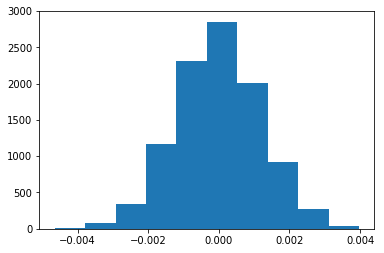

In [186]:
plt.hist(p_diffs); #Was expecting a normal distribution, this is fairly close to one

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [191]:
# first let's compute the observed difference (from actual dataset) of conversion rates \
# between the treatment and control group
obs_diff = df_treatment['converted'].mean()- df_control['converted'].mean()
obs_diff

-0.0015782389853555567

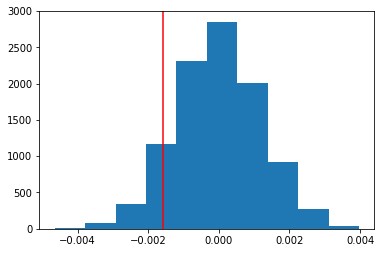

In [192]:
# now let's plot that obs_diff on the histogram of simulated p_diffs
plt.hist(p_diffs) #same histogram as above
plt.axvline(x=obs_diff, color='red'); #adding in the line for the actual/observed difference since we are about to calculate p-value

In [193]:
# What proportion of the p_diffs are greater than the actual difference observed in ab_data.csv?
(act_diff < p_diffs).mean()

0.9012

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

We just computed the proportion of  diffs in the simulated statistical distribution that were greated than the actual difference we observed in the orginal datastet. In scientific studies, this proportion is referred to as the **p_value**. If the p-value is less than your Type I error threshold (in our case 5%), then we have evidence to reject the null and choose the alternative.  Since that is clearly not the case here i.e., the p-value is above 90%, we fail to reject the null hypothesis.  

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [194]:
import statsmodels.api as sm

convert_old = 17489
convert_new = 17264
n_old = 145274
n_new = 145310

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [195]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new],alternative='smaller')
z_score, p_value
# z-score is 1.31, p-value is 0.905

(1.3109241984234394, 0.90505831275902449)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

The p-value is virtually identical to the one we computed 'manually' under question J. It means the same thing: since it is a much greater value than the tolerance threshold for Type 1 errors (.05) therefore "we fail to reject the null hypothesis." The z-score (sometime known as a z-stat) is the regression coefficient divided by its standard deviation. Though I haven't had a chance for a deep-dive into z-scores, from some quick internet research, it seems that a result under 2 (which is the case here) also carries equates to "fail to reject the null hypothesis."

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

This is a logistic regression model since the result will be binary (0 = not converted,1 = converted).

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [210]:
df2['intercept'] = 1 # add intercept
df2[['control','treatment']] = pd.get_dummies(df2['group']) #create dummy variables from group
df2['ab_page'] = df2['treatment'] # create ab_page column by duplicating treatment column
df2 = df2.drop(['control','treatment'], axis=1) # drop original 'control' and 'treatment' dummy variables
# df2 = df2.drop(['ab_page'], axis=1)
df2.sample(5)

,index,user_id,timestamp,group,landing_page,converted,intercept,ab_page
99012,200449,730886,2017-01-17 16:56:23.518252,treatment,new_page,0,1,1
63709,129025,806281,2017-01-07 05:20:47.392414,treatment,new_page,0,1,1
93930,190170,835724,2017-01-20 11:46:44.005326,treatment,new_page,1,1,1
158052,25897,903340,2017-01-04 20:15:42.360046,control,old_page,1,1,0
203846,118984,926443,2017-01-20 04:52:40.531484,control,old_page,0,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [211]:
import statsmodels.api as sm # think this is already imported, so not sure why we are being asked to repeat

logit = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = logit.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [212]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Thu, 04 Jan 2018   Pseudo R-squ.:               8.077e-06
Time:                        12:26:55   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  

**Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

The p-value associated with **ab_page** is .190.  It differs from the values found in Part II because it is a two-sided rather than one-sided test. The null and alternative hypotheses here are: <br>

$ H_0: p_{new} = p_{old} $ <br> 
$ H_1: p_{new} \neq p_{old} $ <br> 

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

It might be a good idea to consider time factors (time of day, day of week,etc.) as mentioned previously. And per the next exercise, it also is worthwhile to think in terms of geography. Reason for this would be to consider **Simpson's paradox** and whether aggregate statistics might be hiding something interest in the results for specific sub-groups.

A disadvantage to adding multiple terms into a regression model are that if there is multicollinearity among the terms, the regression model may yield confusing values among the  coefficients and p-values and that may make it more difficult to interpret.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [274]:
# read in the csv and join to the previous df2
countries_df = pd.read_csv('countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_new.head()

,country,index,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,,
834778,UK,143206,2017-01-14 23:08:43.304998,control,old_page,0,1,0
928468,US,157345,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,257177,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,48778,2017-01-22 03:14:24.763511,control,old_page,0,1,0
710616,UK,106686,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [275]:
# taking a look at the counts by country
df_new['country'].value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [276]:
### Create the necessary dummy variables to perform regression in terms of the US
df_new[['CA','UK']] = pd.get_dummies(df_new['country'])[['CA','UK']] #choosing to show CA and UK in terms of US

In [277]:
# fit the logistic regression model to the data              
mod = sm.Logit(df_new['converted'], df_new[['intercept', 'UK','CA']])
results = mod.fit()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


In [278]:
# print summary
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Thu, 04 Jan 2018   Pseudo R-squ.:               1.521e-05
Time:                        13:11:50   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9967      0.007   -292.314      0.000      -2.010      -1.983
UK             0.0099      0.013      0.746      0.456      -0.016       0.036
CA            -0.0408      0.027     -1.518      0.129      -0.093       0.012
==============================================================================
"""

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [279]:
#  we actually don't need new columns because per our earlier work, 
# 'ab_page' matches the new_page value exactly.
df_new.sample(5)

,country,index,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK
user_id,,,,,,,,,,
903175,US,8896,2017-01-16 11:13:54.761601,control,old_page,1,1,0,0,0
714893,US,290850,2017-01-16 14:04:13.468375,treatment,new_page,0,1,1,0,0
833836,UK,215566,2017-01-10 00:49:09.206465,treatment,new_page,1,1,1,0,1
921054,US,157176,2017-01-02 23:43:55.368895,control,old_page,0,1,0,0,0
701057,US,133383,2017-01-22 08:36:29.935031,treatment,new_page,0,1,1,0,0


In [280]:
mod2 = sm.Logit(df_new['converted'], df_new[['intercept', 'UK','CA','ab_page']])
results2 = mod2.fit()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


In [281]:
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Thu, 04 Jan 2018   Pseudo R-squ.:               2.323e-05
Time:                        13:12:22   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9893      0.009   -223.763      0.000      -2.007      -1.972
UK             0.0099      0.013      0.743      0.457      -0.016       0.036
CA            -0.0408      0.027     -1.516      0.130      -0.093       0.012
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
==============================================================================
"""

This regression model shows convincingly that we fail to reject the null hypothesis for the data set as a whole and for the terms that we have identified as potential influencers. The small coefficients indicate the UK and Canada have conversion rates very similar to those of the US (especially when you exponentiate those coeffecients).  For those who receive the new_page, conversion rate appears if anything a small amount lower than for the control group.  The p-values for all of these terms are well above the 5% tolerance for Type I errors.

Just to prove to myself that it made sense, I also calculated the conversion rates for each country and type of page manually (see below).  This appears to confirm the result of the regression tests.

In [282]:
df_new.shape
df_new.sample(3)

,country,index,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK
user_id,,,,,,,,,,
876109,CA,39614,2017-01-05 05:51:14.379781,treatment,new_page,0,1,1,1,0
854615,UK,9736,2017-01-18 23:57:14.366215,treatment,new_page,0,1,1,0,1
905719,UK,118559,2017-01-05 13:19:29.429470,treatment,new_page,0,1,1,0,1


In [283]:
df_uk = df_new[df_new['country'] == 'UK']
df_uk['converted'].mean()

0.12059448568984076

In [284]:
df_uk[df_uk['ab_page'] == 1]['converted'].mean()

0.1211709965102753

In [285]:
df_uk[df_uk['ab_page'] == 0]['converted'].mean()

0.12002200220022002

In [286]:
df_ca = df_new[df_new['country'] == 'CA']
df_ca['converted'].mean()

0.11531829781364232

In [287]:
df_ca[df_ca['ab_page'] == 1]['converted'].mean()

0.11190247911245035

In [288]:
df_ca[df_ca['ab_page'] == 0]['converted'].mean()

0.11878299527646569

In [289]:
df_us = df_new[df_new['country'] == 'US']
df_us['converted'].mean()

0.1195468006423762

In [290]:
df_us.sample(5)
df_us[df_us['ab_page'] == 1]['converted'].mean()

0.11846559963887227

In [291]:
df_us[df_us['ab_page'] == 0]['converted'].mean()

0.12062998938220143

In [292]:
df_us.shape[0], df_ca.shape[0], df_uk.shape[0]

(203619, 14499, 72466)

<a id='conclusions'></a>
## Conclusions

Congratulations on completing the project! 

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.